## Ejercicio 1

Create a function my_knn that accepts any measure from the philentropy package and performs basic knn.

• A possible function interface could be:

    my_knn <- function(train, train_labels, test, k=1, metric=“euclidean”)
    
• The function will output the predictions over the test set. 

• Select two distance/similarity measures and apply the my_knn function to each of them with different k choices for the breast cancer data and do a comparison of the results (try using a plot).

## Ejercicio 2


• Using the breast cancer dataset: 

    • Divide into training and test (80%, 20%) 32 

    • Perform 10 fold-cv with logistic regression over the training data. 

    • Test final model on test data.

## Ejercicio 3


• Use Smarket data (without Today variable)

• Try with lda using all Lag variables. 

• Repeat with qda and compare.

In [9]:
library("ISLR")
library("MASS")

install.packages("tidyverse")

data(Smarket)
Smarket %>% dplyr::select(-Today)

also installing the dependencies 'bit', 'fs', 'bit64', 'progress', 'processx', 'evaluate', 'xfun', 'blob', 'lifecycle', 'tidyselect', 'vctrs', 'data.table', 'gargle', 'ids', 'rematch2', 'ellipsis', 'timechange', 'vroom', 'tzdb', 'callr', 'knitr', 'broom', 'cli', 'crayon', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'hms', 'httr', 'jsonlite', 'lubridate', 'modelr', 'pillar', 'purrr', 'readr', 'reprex', 'rlang', 'rstudioapi', 'rvest', 'tibble', 'tidyr', 'xml2'




  There are binary versions available but the source versions are later:
              binary source needs_compilation
fs             1.5.0  1.5.2              TRUE
processx       3.5.2  3.8.0              TRUE
evaluate        0.14   0.18             FALSE
xfun            0.22   0.34              TRUE
blob           1.2.1  1.2.3             FALSE
lifecycle      1.0.0  1.0.3             FALSE
tidyselect     1.1.1  1.2.0             FALSE
vctrs          0.3.8  0.5.0              TRUE
data.table    1.14.0 1.14.4              TRUE
gargle         1.1.0  1.2.1             FALSE
timechange     0.0.2  0.1.1              TRUE
vroom          1.4.0  1.6.0              TRUE
tzdb           0.1.1  0.3.0              TRUE
callr          3.7.0  3.7.3             FALSE
knitr           1.33   1.40             FALSE
broom          0.7.6  1.0.1             FALSE
cli            2.5.0  3.4.1              TRUE
crayon         1.4.1  1.5.2             FALSE
dbplyr         2.1.1  2.2.1             FALSE
dplyr 

Warning message:
"cannot remove prior installation of package 'vctrs'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar E:\anaconda\Lib\R\library\00LOCK\vctrs\libs\x64\vctrs.dll  a E:\anaconda\Lib\R\library\vctrs\libs\x64\vctrs.dll: Permission denied"Warning message:
"restored 'vctrs'"

package 'data.table' successfully unpacked and MD5 sums checked
package 'ids' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'timechange' successfully unpacked and MD5 sums checked
package 'vroom' successfully unpacked and MD5 sums checked
package 'tzdb' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar E:\anaconda\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll  a E:\anaconda\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'lubridate' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar E:\anaconda\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll  a E:\anaconda\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'xml2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rafac\AppData\Local\Temp\RtmpCuhrsJ\downloaded_packages


installing the source packages 'evaluate', 'blob', 'lifecycle', 'tidyselect', 'gargle', 'callr', 'knitr', 'broom', 'crayon', 'dbplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'hms', 'httr', 'modelr', 'pillar', 'reprex', 'rstudioapi', 'rvest', 'tidyverse'

Warning message in install.packages("tidyverse"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'broom' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'tidyselect' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'gargle' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of packag

ERROR: Error in Smarket %>% dplyr::select(-Today): no se pudo encontrar la función "%>%"


Antes de ejecutar lda con todas se observar si todas las variables Lag tienen una varianza similar y una distribucion normal.

In [24]:
shapiro.test(Smarket$Lag1)
shapiro.test(Smarket$Lag2)
shapiro.test(Smarket$Lag3)
shapiro.test(Smarket$Lag4)
shapiro.test(Smarket$Lag5)


	Shapiro-Wilk normality test

data:  Smarket$Lag1
W = 0.97219, p-value = 8.889e-15



	Shapiro-Wilk normality test

data:  Smarket$Lag2
W = 0.97217, p-value = 8.798e-15



	Shapiro-Wilk normality test

data:  Smarket$Lag3
W = 0.9724, p-value = 1.035e-14



	Shapiro-Wilk normality test

data:  Smarket$Lag4
W = 0.97242, p-value = 1.049e-14



	Shapiro-Wilk normality test

data:  Smarket$Lag5
W = 0.97011, p-value = 2.149e-15


Los resultados nos dan un p-value muy bajo en todos los casos, no son superiors a un valor de 0.05 por tanto no poseen una distribucción normal y podemos asumir que LDA no funcionará muy bien.

[1] 1.291175

[1] 1.291133

[1] 1.296644

[1] 1.296806

[1] 1.316871

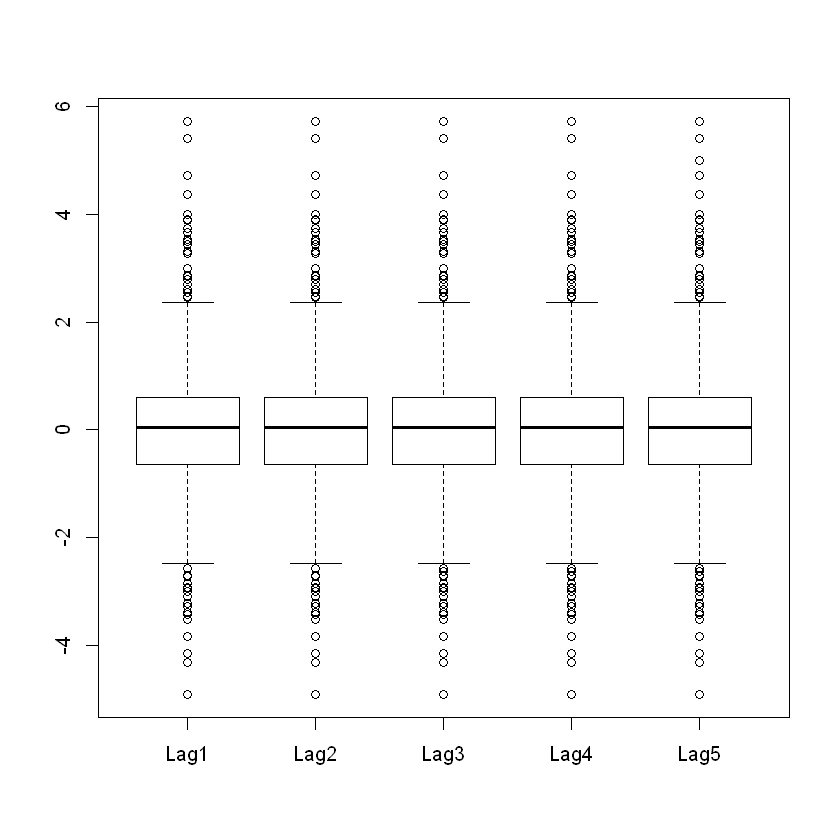

In [25]:
var(Smarket$Lag1)
var(Smarket$Lag2)
var(Smarket$Lag3)
var(Smarket$Lag4)
var(Smarket$Lag5)

boxplot(Smarket[ , 2:6])

Las varianzas son similares excepto para el caso de Lag5, lo cual puede afectar a los resultados.

Tras estas observaciones se procede a la aplicación de LDA

In [45]:
#Tomamos todos los años menos 2005, para usar estos casos para un futuro predict
Smarket.lda <- lda(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5, data=Smarket, subset= Year<2005)
Smarket.lda

Call:
lda(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5, data = Smarket, 
    subset = Year < 2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2         Lag3         Lag4          Lag5
Down  0.04279022  0.03389409 -0.009806517 -0.010598778  0.0043665988
Up   -0.03954635 -0.03132544  0.005834320  0.003110454 -0.0006508876

Coefficients of linear discriminants:
             LD1
Lag1 -0.63046918
Lag2 -0.50221745
Lag3  0.10142974
Lag4  0.09725317
Lag5 -0.03685767

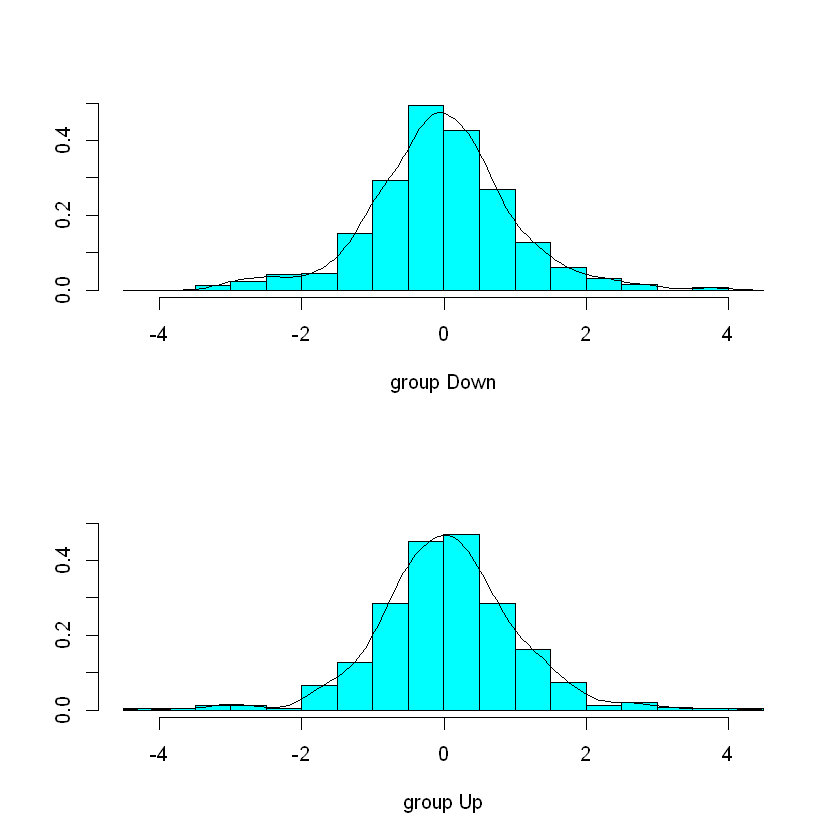

In [46]:
plot(Smarket.lda, type="both")

Podemos predecir los datos a partir del modelo que acabamos de generar

In [47]:
Smarket_2005 <- subset(Smarket, Year == 2005)
pred_lda <- predict(Smarket.lda, Smarket_2005)

In [48]:
table(pred_lda$class, Smarket_2005$Direction)
mean(pred_lda$class == Smarket_2005$Direction)

      
       Down  Up
  Down   37  30
  Up     74 111

[1] 0.5873016

Efectivamente los resultados no son los desados.

Procedamos a representar graficamente estos resultados

In [1]:
install.packages("klaR")
library(klaR)
partimat(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5, data=Smarket, method="lda")

also installing the dependencies 'cli', 'rlang', 'tidyselect', 'tibble', 'vctrs', 'pillar', 'fontawesome', 'htmltools', 'glue', 'bslib', 'lifecycle', 'haven', 'dplyr', 'shiny', 'labelled', 'questionr'




  There are binary versions available but the source versions are later:
             binary source needs_compilation
cli           2.5.0  3.4.1              TRUE
rlang        0.4.11  1.0.6              TRUE
tidyselect    1.1.1  1.2.0             FALSE
tibble        3.1.1  3.1.8              TRUE
vctrs         0.3.8  0.5.0              TRUE
pillar        1.6.0  1.8.1             FALSE
fontawesome   0.2.1  0.4.0             FALSE
htmltools   0.5.1.1  0.5.3              TRUE
glue          1.4.2  1.6.2              TRUE
bslib         0.2.4  0.4.1             FALSE
lifecycle     1.0.0  1.0.3             FALSE
haven         2.4.1  2.5.1              TRUE
dplyr         1.0.6 1.0.10              TRUE
shiny         1.6.0  1.7.3             FALSE
labelled      2.8.0 2.10.0             FALSE
questionr     0.7.3  0.7.7             FALSE
klaR         0.6-15  1.7-1             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully 

Warning message:
"cannot remove prior installation of package 'htmltools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar E:\anaconda\Lib\R\library\00LOCK\htmltools\libs\x64\htmltools.dll  a E:\anaconda\Lib\R\library\htmltools\libs\x64\htmltools.dll: Permission denied"Warning message:
"restored 'htmltools'"

package 'glue' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rafac\AppData\Local\Temp\RtmpCuhrsJ\downloaded_packages


installing the source packages 'tidyselect', 'pillar', 'fontawesome', 'bslib', 'lifecycle', 'shiny', 'labelled', 'questionr', 'klaR'

Warning message in install.packages("klaR"):
"installation of package 'fontawesome' had non-zero exit status"Warning message in install.packages("klaR"):
"installation of package 'bslib' had non-zero exit status"Warning message in install.packages("klaR"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("klaR"):
"installation of package 'tidyselect' had non-zero exit status"Warning message in install.packages("klaR"):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages("klaR"):
"installation of package 'shiny' had non-zero exit status"Warning message in install.packages("klaR"):
"installation of package 'labelled' had non-zero exit status"Warning message in install.packages("klaR"):
"installation of package 'questionr' had non-zero exit status"Warning message in 

ERROR: Error in library(klaR): there is no package called 'klaR'
